<a href="https://colab.research.google.com/github/XimeeeRJ/THC-XRJ/blob/Tareas/Proyecto_2_THC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.8 MB/s eta 0:00:00


In [3]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=ec39d3ffae52c2ff7b4335b5820e5ddf7688f2baa3f2cfe30266511e9521804a
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [4]:
link = 'https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code= '?raw=true'
url=link+code
df= pd.read_csv(url,sep=',',index_col=1)

# DataFrame Italia

In [5]:
df['Country'].isin(['Italy']).sum()

141

In [6]:
It = df[df['Country']=='Italy']

In [7]:
It

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
14/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
15/05/2015,Italy,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
18/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
19/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
20/05/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
22/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/12/2015,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [8]:
It = It.drop('Country',axis=1)

In [9]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
14/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
18/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
19/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
20/05/2015,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [10]:
It.isnull().sum()

No. of confirmed cases       0
No. of confirmed deaths    140
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [11]:
#Promedio para rellenar el numero de muertes
mean_values=It['No. of confirmed deaths'].mean()
mean_values

0.0

In [12]:
It['No. of confirmed deaths'].mean()

0.0

In [13]:
It['No. of confirmed cases'].mean()

1.0

In [14]:
# Verificar si hay datos faltantes en la columna 'No. of confirmed cases'
missing_values = It['No. of confirmed cases'].isnull().sum()
print(f"Número de valores faltantes: {missing_values}")

Número de valores faltantes: 0


In [15]:
It.fillna(0.0,inplace=True)

In [16]:
Dates = It.index[0:-1:15]
NCC = It['No. of confirmed cases'][0:-1:15]
NCD = It['No. of confirmed deaths'][0:-1:15]

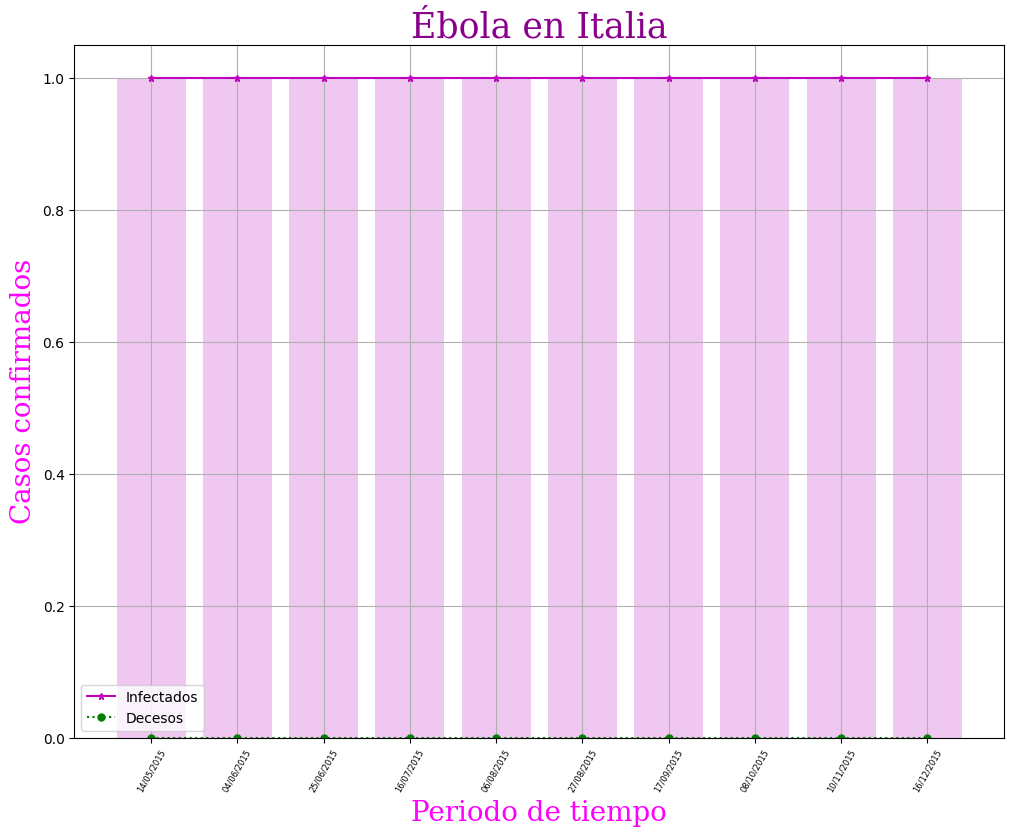

In [17]:
fig = plt.figure(figsize=(12, 9))  # Para que salga completa la imagen
plt.plot(Dates, NCC, '*-m', ms=5, label='Infectados')
plt.bar(Dates, NCC, color="m", alpha=0.22)
plt.plot(Dates, NCD, 'o:g', ms=5, label='Decesos')
plt.bar(Dates, NCD, color="g", alpha=0.32)
plt.grid()
font1 = {'family':'serif','color':'darkmagenta','size':25}
font2 = {'family':'serif','color':'magenta','size':20}
plt.title('Ébola en Italia', fontdict= font1)
plt.ylabel('Casos confirmados', fontdict = font2)
plt.xlabel('Periodo de tiempo', fontdict = font2)
plt.xticks(rotation=60, fontsize=6)
plt.legend()
plt.savefig("Ebola_Italia.png", dpi=500, format='png')
plt.show()


In [18]:
PIvsD=100*It['No. of confirmed deaths']/It['No. of confirmed cases']
It['PIvsD']=PIvsD

In [19]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,
14/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
18/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
19/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
20/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0


In [20]:
recuperados=((100-PIvsD)/100)*It['No. of confirmed cases']
It['recuperados']=recuperados

In [21]:
It.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados
Date,,,,,,,,,,,,
14/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
15/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
18/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
19/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0
20/05/2015,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0,1.0


In [22]:
It['PR']=(100-PIvsD)

In [23]:
PIvsD_mean=It['PIvsD'].mean()
PR_mean=It['PR'].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=['PIvsD','PR']

# Histogramas población Italiana

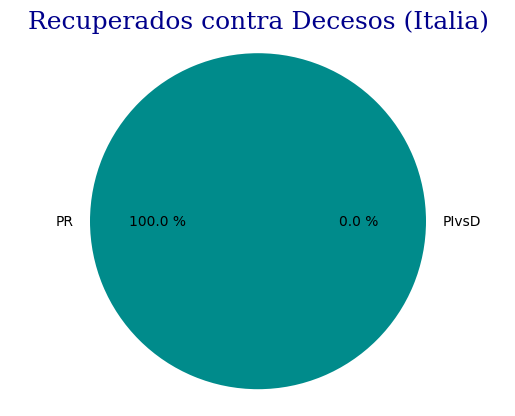

In [24]:
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%', colors=['pink','darkcyan'])
plt.axis("equal")
font1 = {'family':'serif','color':'darkblue','size':18}
plt.title("Recuperados contra Decesos (Italia)", fontdict= font1)
plt.savefig("Porcentaje_de_Recuperados_contra_Decesos_Italia.png",dpi=300,format='png')
plt.show()

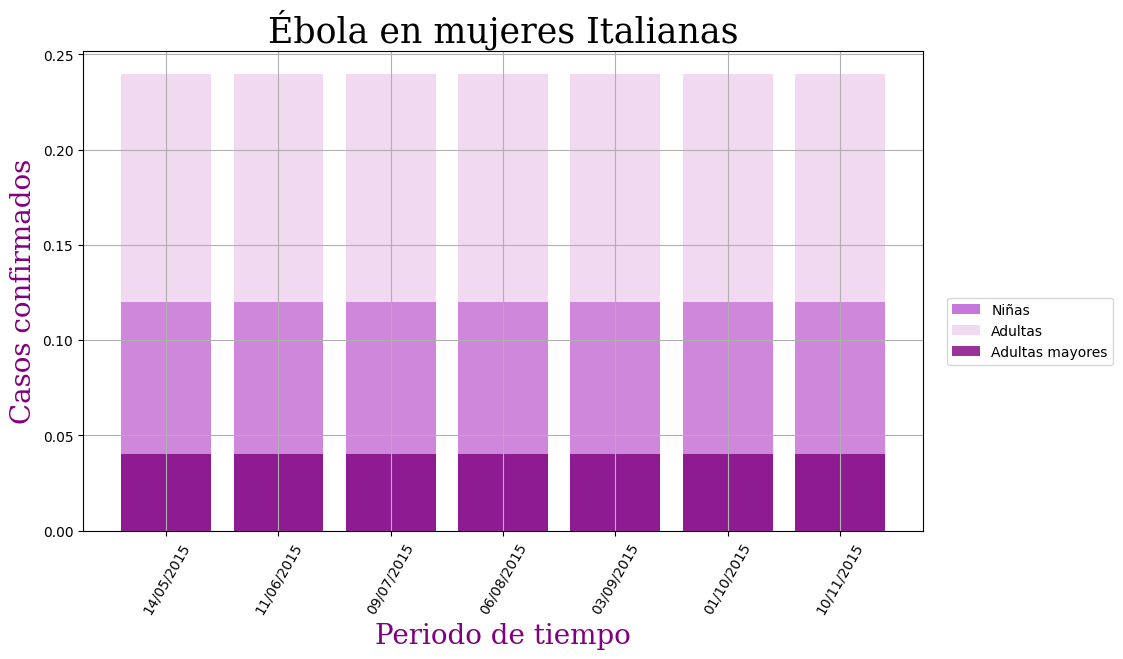

In [25]:
G = It['Girls'][0:-1:20]
AF = It['Adult Female'][0:-1:20]
OF = It['Old Female'][0:-1:20]
Dates = It.index[0:-1:20]

font1 = {'family': 'serif', 'color': 'black', 'size': 25}
font2 = {'family': 'serif', 'color': 'purple', 'size': 20}

# Ajustar márgenes
fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Niñas
plt.bar(Dates, G, color='mediumorchid', alpha=0.8, label='Niñas')

# Gráfico de barras para Adultas
plt.bar(Dates, AF, color='plum', alpha=0.4, label='Adultas')

# Gráfico de barras para Adultas mayores
plt.bar(Dates, OF, color='purple', alpha=0.8, label='Adultas mayores')

plt.grid()
plt.title("Ébola en mujeres Italianas", fontdict=font1)
plt.ylabel('Casos confirmados', fontdict=font2)
plt.xlabel('Periodo de tiempo', fontdict=font2)
plt.xticks(rotation=60, fontsize=10)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados en formato PNG
plt.savefig("Distribucion_del_ebola_en_mujeres.png", dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()


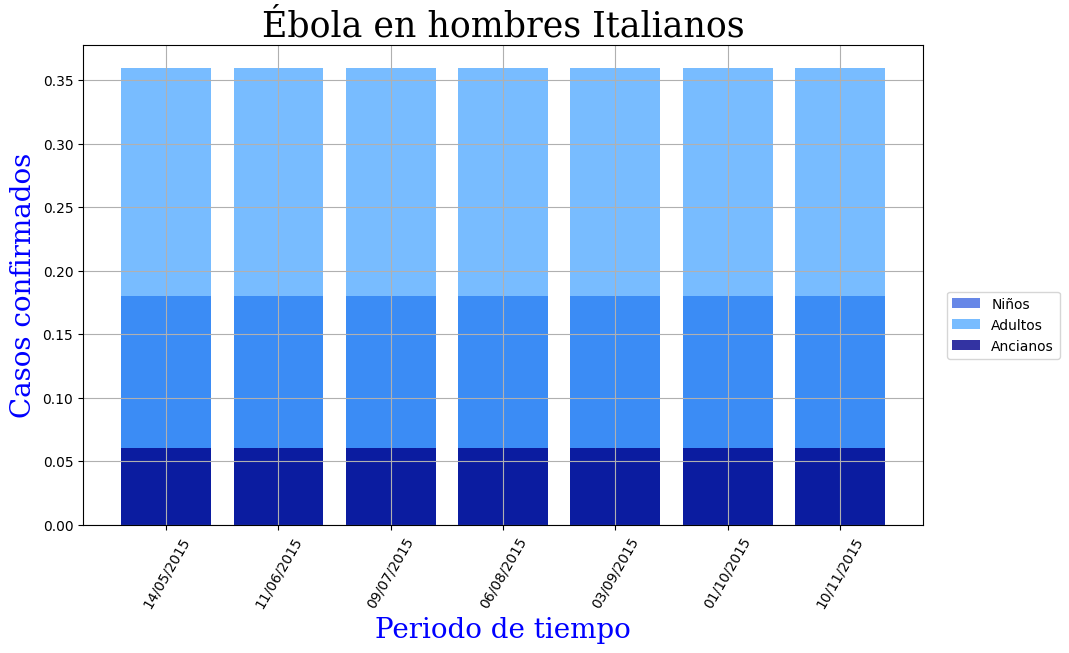

In [26]:
B = It['Boys'][0:-1:20]
AF = It['Adult Male'][0:-1:20]
OF = It['Old Male'][0:-1:20]
Dates = It.index[0:-1:20]

font1 = {'family': 'serif', 'color': 'black', 'size': 25}
font2 = {'family': 'serif', 'color': 'blue', 'size': 20}

# Ajustar márgenes
fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Niños
plt.bar(Dates, B, color='royalblue', alpha=0.8, label='Niños')  # Cambiado a color azul

# Gráfico de barras para Adultos
plt.bar(Dates, AF, color='dodgerblue', alpha=0.6, label='Adultos')  # Cambiado a color azul

# Gráfico de barras para Ancianos
plt.bar(Dates, OF, color='darkblue', alpha=0.8, label='Ancianos')

plt.grid()
plt.title("Ébola en hombres Italianos", fontdict=font1)
plt.ylabel('Casos confirmados', fontdict=font2)
plt.xlabel('Periodo de tiempo', fontdict=font2)
plt.xticks(rotation=60, fontsize=10)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados en formato PNG
plt.savefig("Distribucion_del_ebola_en_hombres_italianos.png", dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()



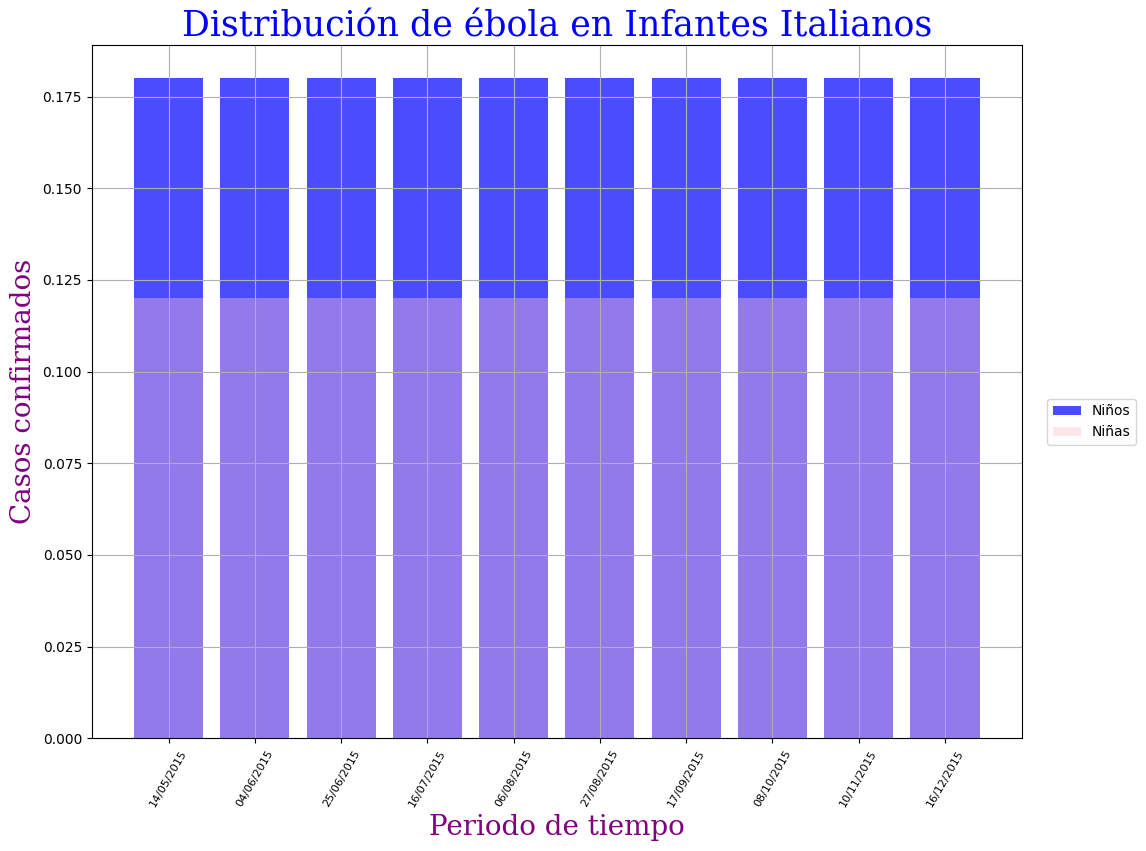

In [27]:
G = It['Girls'][0:-1:15]
B = It['Boys'][0:-1:15]
Dates = It.index[0:-1:15]

font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'purple','size':20}
plt.figure(figsize=(12,9))
plt.bar(Dates, B, color='blue', alpha=0.7, label='Niños')
plt.bar(Dates, G, color='pink', alpha=0.4, label='Niñas')
plt.grid()
plt.title("Distribución de ébola en Infantes Italianos", fontdict= font1)
plt.ylabel("Casos confirmados", fontdict= font2 )
plt.xlabel("Periodo de tiempo", fontdict= font2 )
plt.xticks(rotation=60, fontsize=8)
plt.legend(loc='upper left', bbox_to_anchor=(1.02,0.5))
plt.savefig('Infantes-Italianos.png', dpi=300, format='png')
plt.show()

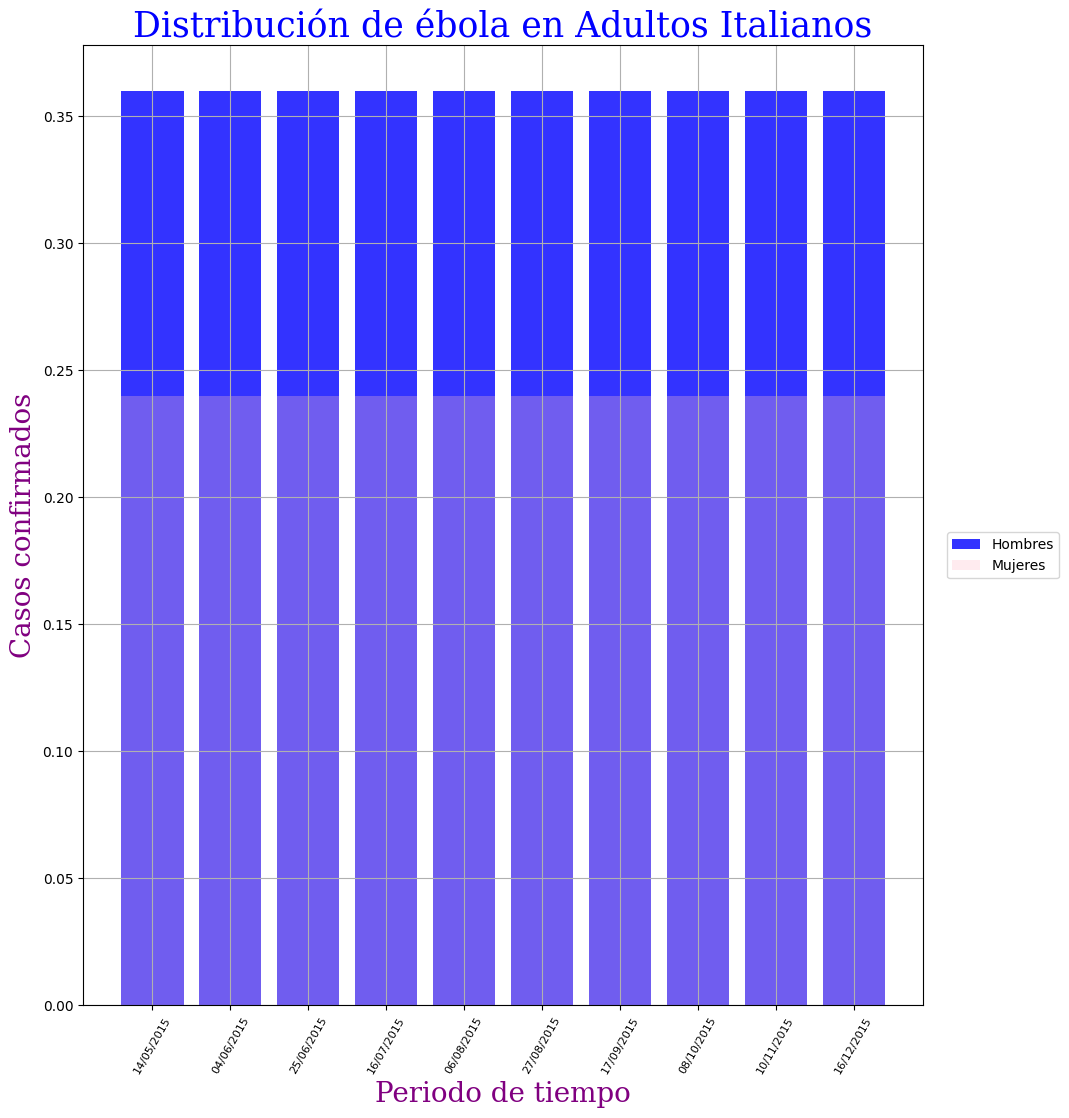

In [28]:
AF = It['Adult Female'][0:-1:15]
AM = It['Adult Male'][0:-1:15]
Dates = It.index[0:-1:15]

font1 = {'family': 'serif', 'color': 'blue', 'size': 25}
font2 = {'family': 'serif', 'color': 'purple', 'size': 20}

# Ajusta los márgenes para dejar espacio para el título y las etiquetas
plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Grafico de barras para Hombres
plt.bar(Dates, AM, color='blue', alpha=0.8, label='Hombres')

# Grafico de barras para Mujeres
plt.bar(Dates, AF, color='pink', alpha=0.3, label='Mujeres')

plt.grid()
plt.title("Distribución de ébola en Adultos Italianos", fontdict=font1)
plt.ylabel("Casos confirmados", fontdict=font2)
plt.xlabel("Periodo de tiempo", fontdict=font2)
plt.xticks(rotation=60, fontsize=8)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guarda la figura con márgenes ajustados
plt.savefig('Adultos_Italianos.png', dpi=300, format='png', bbox_inches='tight')

# Muestra la figura
plt.show()


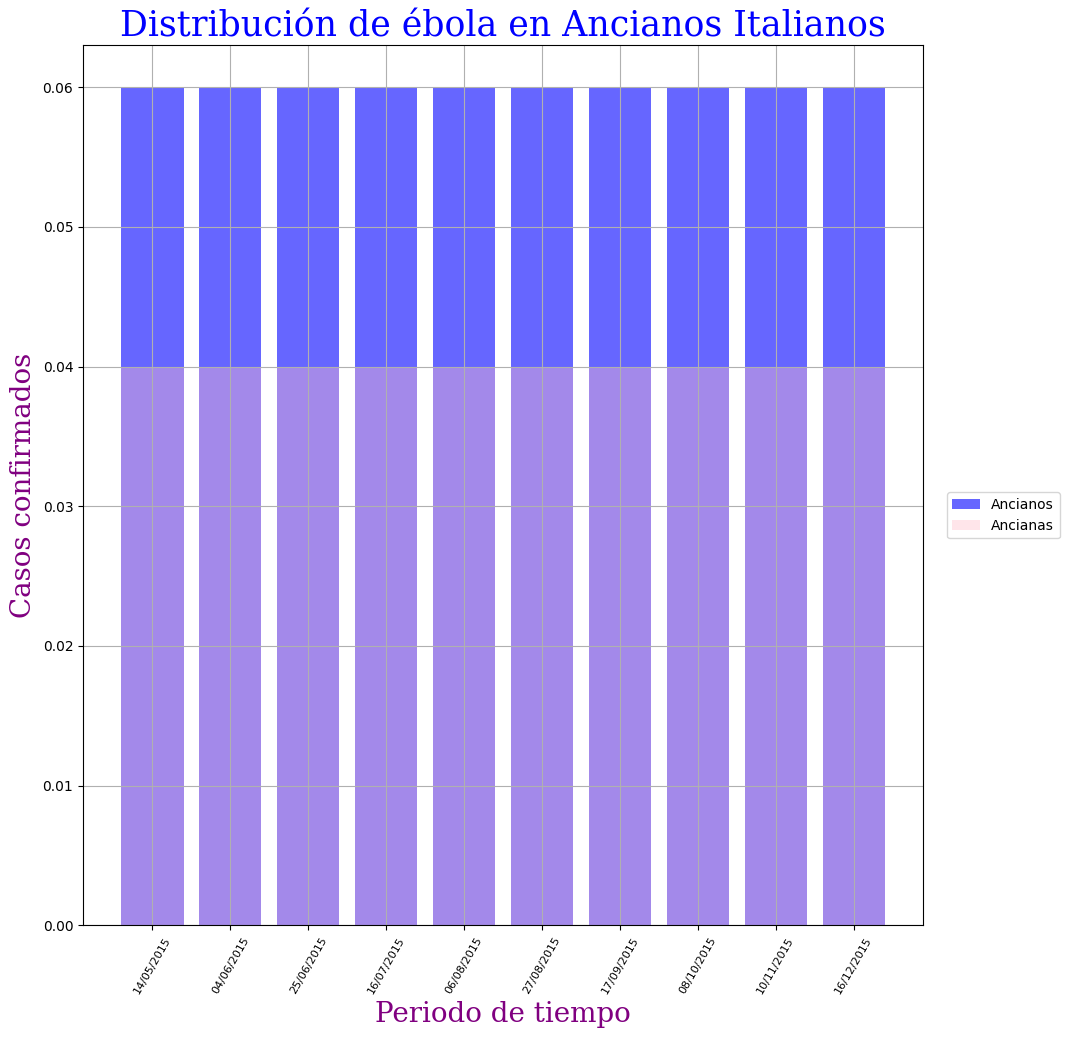

In [29]:
OF = It['Old Female'][0:-1:15]
OM = It['Old Male'][0:-1:15]
Dates = It.index[0:-1:15]

font1 = {'family': 'serif', 'color': 'blue', 'size': 25}
font2 = {'family': 'serif', 'color': 'purple', 'size': 20}

# Ajusta los márgenes para dejar espacio para el título y las etiquetas
plt.figure(figsize=(12, 11))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Grafico de barras para Ancianos
plt.bar(Dates, OM, color='blue', alpha=0.6, label='Ancianos')

# Grafico de barras para Ancianas
plt.bar(Dates, OF, color='pink', alpha=0.4, label='Ancianas')

plt.grid()
plt.title("Distribución de ébola en Ancianos Italianos", fontdict=font1)
plt.ylabel("Casos confirmados", fontdict=font2)
plt.xlabel("Periodo de tiempo", fontdict=font2)
plt.xticks(rotation=60, fontsize=8)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guarda la figura con márgenes ajustados
plt.savefig('Ancianos_Italianos.png', dpi=300, format='png', bbox_inches='tight')

# Muestra la figura
plt.show()

# Entrenamiento de datos de la poblacion italiana

In [30]:
Boys=It['Boys'].to_numpy()
It_Boys=pd.DataFrame({'Boys':Boys})
It_Boys.index=pd.to_datetime(It.index,format='%d/%m/%Y')
It_Boys=It_Boys.sort_index()

In [31]:
It_Boys

,Boys
Date,
2015-05-14,0.18
2015-05-15,0.18
2015-05-18,0.18
2015-05-19,0.18
2015-05-20,0.18
...,...
2015-12-17,0.18
2015-12-22,0.18
2015-12-23,0.18


In [32]:
Boys = It['Boys'].to_numpy()
It_Boys = pd.DataFrame({'Boys':Boys})
It_Boys.index=pd.to_datetime(It.index, format='%d/%m/%Y')
It_Boys = It_Boys.sort_index()

It_Boys

,Boys
Date,
2015-05-14,0.18
2015-05-15,0.18
2015-05-18,0.18
2015-05-19,0.18
2015-05-20,0.18
...,...
2015-12-17,0.18
2015-12-22,0.18
2015-12-23,0.18


In [33]:
steps = 25
data_train = It_Boys[:-steps]
data_test = It_Boys[-steps:]

In [34]:
print(f"Las fechas son {len(data_train)}")


Las fechas son 116


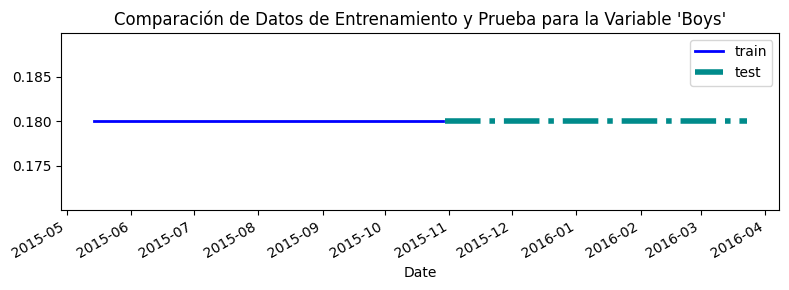

In [35]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Boys'].plot(ax=ax, label='train', color='blue', linewidth= 2)
data_test['Boys'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Boys'")
plt.tight_layout()
plt.savefig("Boys_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()


In [36]:
Girls = It['Girls'].to_numpy()
It_Girls = pd.DataFrame({'Girls':Girls})
It_Girls.index=pd.to_datetime(It.index, format='%d/%m/%Y')
It_Girls = It_Girls.sort_index()

It_Girls

,Girls
Date,
2015-05-14,0.12
2015-05-15,0.12
2015-05-18,0.12
2015-05-19,0.12
2015-05-20,0.12
...,...
2015-12-17,0.12
2015-12-22,0.12
2015-12-23,0.12


In [37]:
steps = 49
data_train = It_Girls[:-steps]
data_test = It_Girls[-steps:]

In [38]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 92


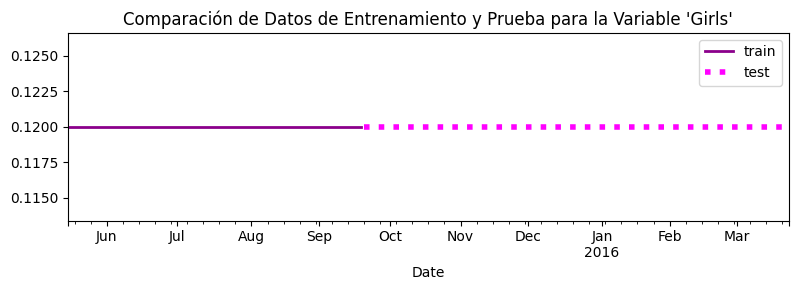

In [39]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Girls'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['Girls'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Girls'")
plt.tight_layout()
plt.savefig("Girls_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()

In [40]:
O_Women= It['Old Female'].to_numpy()
It_O_Women = pd.DataFrame({'O_Women': O_Women})
It_O_Women.index = pd.to_datetime(It.index, format='%d/%m/%Y')
It_O_Women = It_O_Women.sort_index()

It_O_Women


,O_Women
Date,
2015-05-14,0.04
2015-05-15,0.04
2015-05-18,0.04
2015-05-19,0.04
2015-05-20,0.04
...,...
2015-12-17,0.04
2015-12-22,0.04
2015-12-23,0.04


In [41]:
steps = 28
data_train = It_O_Women[:-steps]
data_test = It_O_Women[-steps:]

In [42]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 113


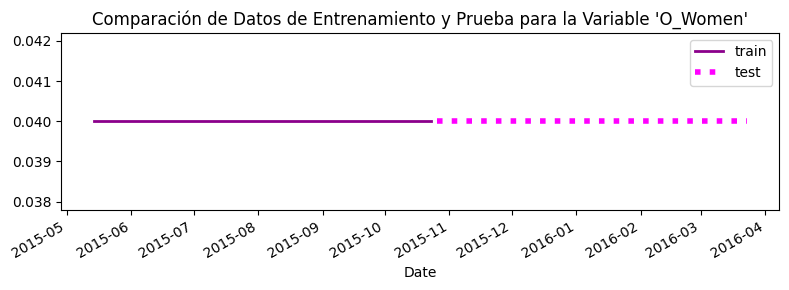

In [43]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['O_Women'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['O_Women'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'O_Women'")
plt.tight_layout()
plt.savefig("O_Women_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()

In [44]:
O_Men= It['Old Male'].to_numpy()
It_O_Men = pd.DataFrame({'O_Men': O_Men})
It_O_Men.index = pd.to_datetime(It.index, format='%d/%m/%Y')
It_O_Men = It_O_Men.sort_index()

It_O_Men

,O_Men
Date,
2015-05-14,0.06
2015-05-15,0.06
2015-05-18,0.06
2015-05-19,0.06
2015-05-20,0.06
...,...
2015-12-17,0.06
2015-12-22,0.06
2015-12-23,0.06


In [45]:
steps = 56
data_train = It_O_Men[:-steps]
data_test = It_O_Men[-steps:]

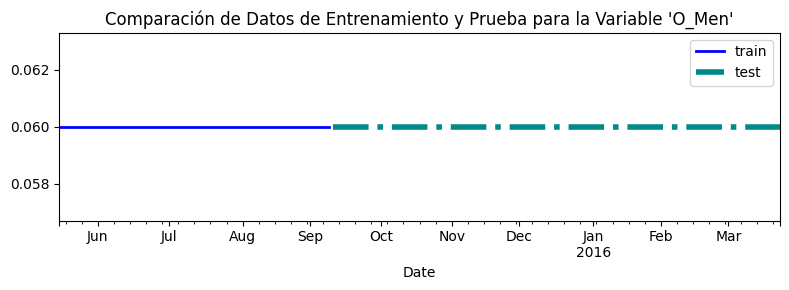

In [46]:
# Gráfica para comparar los datos de entrenamiento vs la prueba
fig, ax = plt.subplots(figsize=(8, 3))

data_train['O_Men'].plot(ax=ax, label='train', color='blue', linewidth= 2)
data_test['O_Men'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'O_Men'")
plt.tight_layout()
plt.savefig("O_Men_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()

In [47]:
Women = It['Adult Female'].to_numpy()
It_Women = pd.DataFrame({'Women': Women})
It_Women.index = pd.to_datetime(It.index, format='%d/%m/%Y')
It_Women = It_Women.sort_index()

It_Women


,Women
Date,
2015-05-14,0.24
2015-05-15,0.24
2015-05-18,0.24
2015-05-19,0.24
2015-05-20,0.24
...,...
2015-12-17,0.24
2015-12-22,0.24
2015-12-23,0.24


In [48]:
steps = 40
data_train = It_Women[:-steps]
data_test = It_Women[-steps:]

In [49]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 101


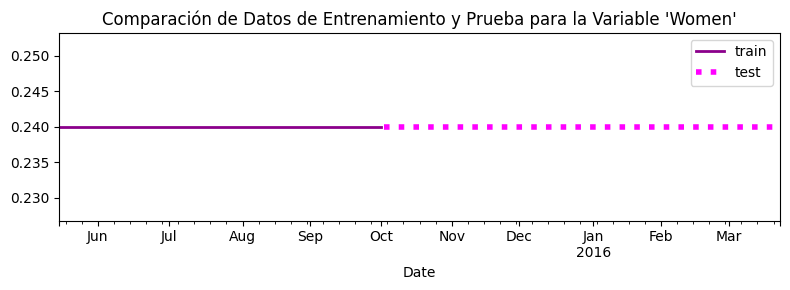

In [50]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Women'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['Women'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Women'")
plt.tight_layout()
plt.savefig("Women_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()

In [51]:
Men = It['Adult Male'].to_numpy()
It_Men = pd.DataFrame({'Men': Men})
It_Men.index = pd.to_datetime(It.index, format='%d/%m/%Y')
It_Men = It_Men.sort_index()

It_Men


,Men
Date,
2015-05-14,0.36
2015-05-15,0.36
2015-05-18,0.36
2015-05-19,0.36
2015-05-20,0.36
...,...
2015-12-17,0.36
2015-12-22,0.36
2015-12-23,0.36


In [52]:
steps = 68
data_train = It_Men[:-steps]
data_test = It_Men[-steps:]

In [53]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 73


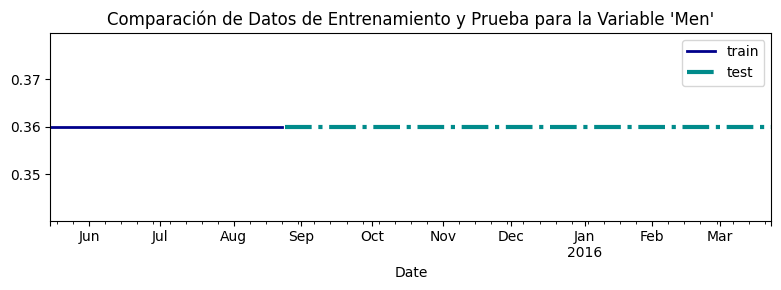

In [54]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Men'].plot(ax=ax, label='train', color='darkblue', linewidth= 2)
data_test['Men'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=3)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Men'")
plt.tight_layout()
plt.savefig("Men_Italia.png",dpi=300,format='png')
ax.legend()
plt.show()

# DataFrame España

In [55]:
df['Country'].isin(['Spain']).sum()

243

In [56]:
S = df[df['Country']=='Spain']

In [57]:
S

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
10/10/2014,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
15/10/2014,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
17/10/2014,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
22/10/2014,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
25/10/2014,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
22/12/2015,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/12/2015,Spain,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [58]:
S.isnull().sum()

Country                    0
No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [59]:
#Promedio para rellenar el numero de muertes
mean_values = S['No. of confirmed deaths'].mean()
mean_values

0.0

In [60]:
S['No. of confirmed cases'].mean()

1.0

In [61]:
S['No. of confirmed deaths'].mean()

0.0

In [62]:
Dates = S.index[0:-1:15]
NCC = S['No. of confirmed cases'][0:-1:15]
NCD = S['No. of confirmed deaths'][0:-1:15]

In [63]:
missing_values = S['No. of confirmed cases'].isnull().sum()
print(f"Número de valores faltantes: {missing_values}")

Número de valores faltantes: 0


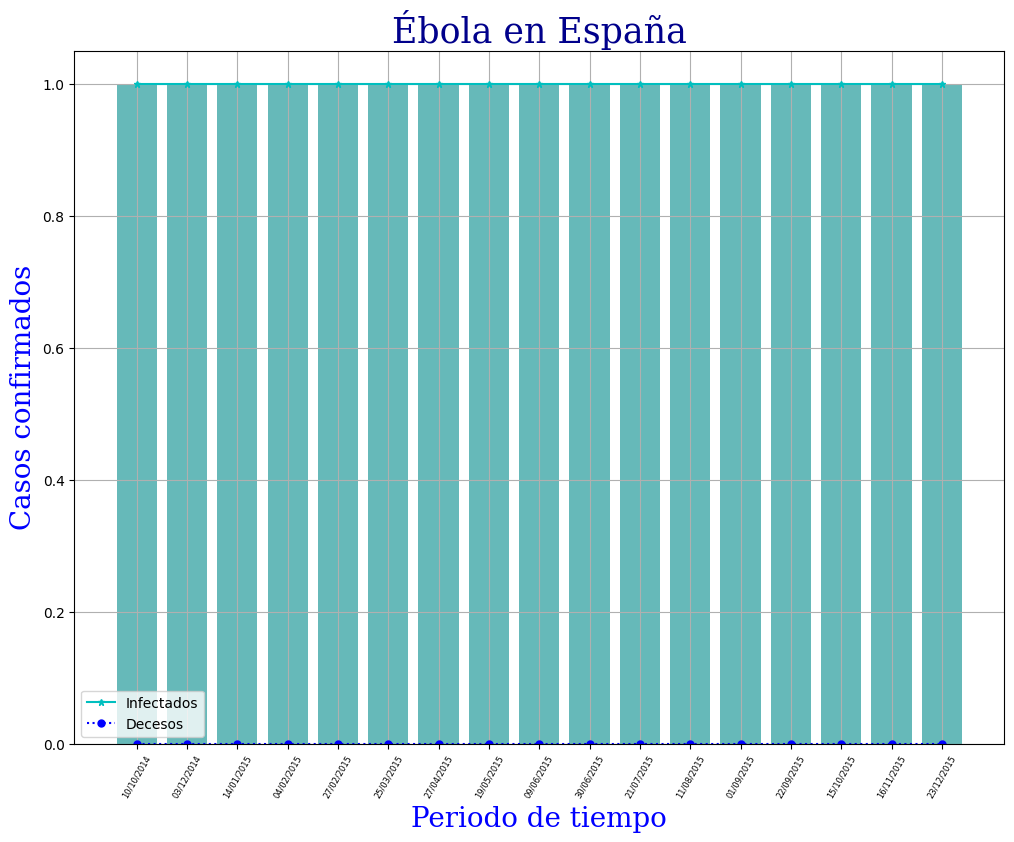

In [64]:
fig = plt.figure(figsize=(12,9)) #Para que salga completa la imagen
plt.plot(Dates,NCC,'*-c',ms=5,label ='Infectados')
plt.bar(Dates, NCC, color = "darkcyan" ,alpha=0.6)
plt.plot(Dates,NCD, 'o:b', ms=5,label='Decesos')
plt.bar(Dates,NCD, color = "blue", alpha = 0.32)
plt.grid()
font1 = {'family':'serif','color':'darkblue','size':25}
font2 = {'family':'serif','color':'blue','size':20}
plt.title('Ébola en España', fontdict= font1)
plt.ylabel('Casos confirmados', fontdict= font2)
plt.xlabel('Periodo de tiempo', fontdict= font2)
plt.xticks(rotation=60, fontsize=6)
plt.legend()
plt.savefig("Ebola_españa.png", dpi=500, format='png')
plt.show()

In [65]:
PIvs_D=100*S['No. of confirmed deaths']/S['No. of confirmed cases']
S.loc[:, 'PIvs_D']=PIvs_D

<ipython-input-65-d2b259036a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S.loc[:, 'PIvs_D']=PIvs_D


In [66]:
recuperados=((100-PIvs_D)/100)*S['No. of confirmed cases']
S['recuperados']=recuperados

<ipython-input-66-c0d92f4a6880>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['recuperados']=recuperados


In [67]:
S['PR']=(100-PIvs_D)

<ipython-input-67-73e3be90ded4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['PR']=(100-PIvs_D)


In [68]:
PIvs_D_mean=S['PIvs_D'].mean()
PR_mean=S['PR'].mean()
porcentajes=[PIvs_D_mean,PR_mean]
etiquetas=['PIvsD','PR']

# Histogramas poblacion Española

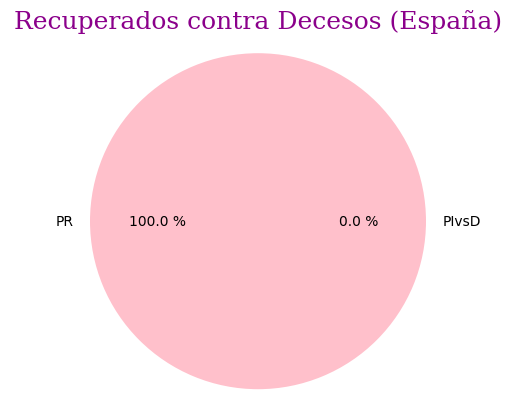

In [69]:
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%', colors=['darkcyan', 'pink'])
plt.axis("equal")
font1 = {'family':'serif','color':'darkmagenta','size':18}
plt.title("Recuperados contra Decesos (España)", fontdict= font1)
plt.savefig("Porcentaje_de_Recuperados_contra_Decesos_España.png",dpi=300,format='png')
plt.show()

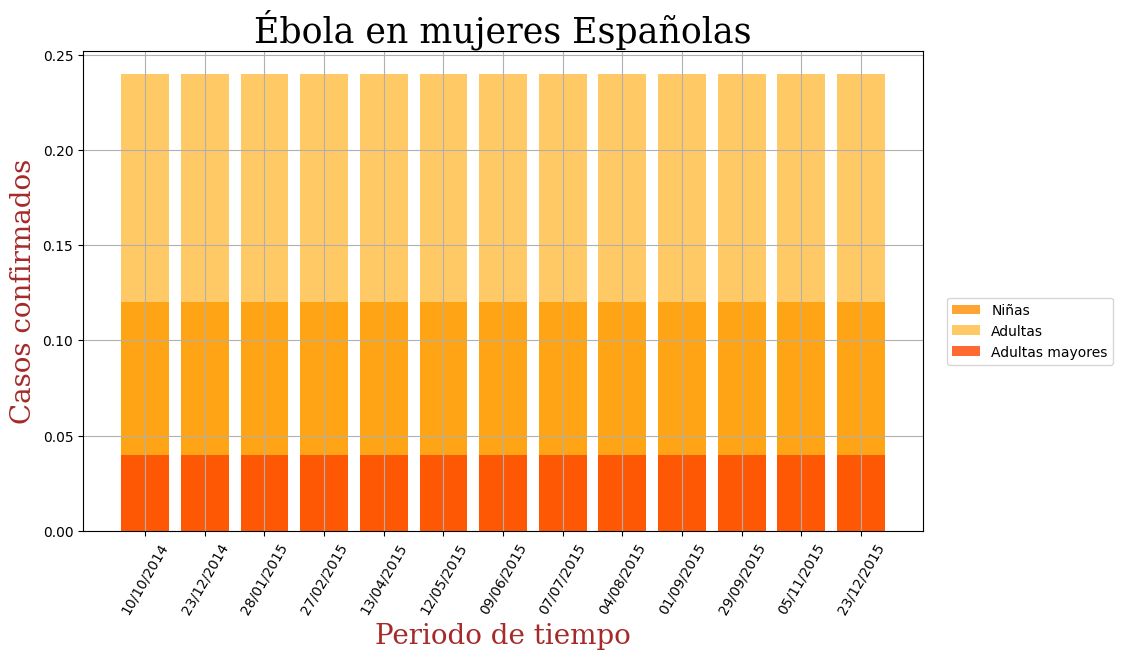

In [70]:
G = S['Girls'][0:-1:20]
AF = S['Adult Female'][0:-1:20]
OF = S['Old Female'][0:-1:20]
Dates = S.index[0:-1:20]

font1 = {'family': 'serif', 'color': 'black', 'size': 25}
font2 = {'family': 'serif', 'color': 'brown', 'size': 20}

# Ajustar márgenes
fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Niñas
plt.bar(Dates, G, color='darkorange', alpha=0.8, label='Niñas')  # Cambiado a color naranja

# Gráfico de barras para Adultas
plt.bar(Dates, AF, color='orange', alpha=0.6, label='Adultas')  # Cambiado a color naranja

# Gráfico de barras para Adultas mayores
plt.bar(Dates, OF, color='orangered', alpha=0.8, label='Adultas mayores')  # Cambiado a color naranja

plt.grid()
plt.title("Ébola en mujeres Españolas", fontdict=font1)
plt.ylabel('Casos confirmados', fontdict=font2)
plt.xlabel('Periodo de tiempo', fontdict=font2)
plt.xticks(rotation=60, fontsize=10)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados en formato PNG
plt.savefig("Distribucion_del_ebola_en_mujeres_espanolas.png", dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()


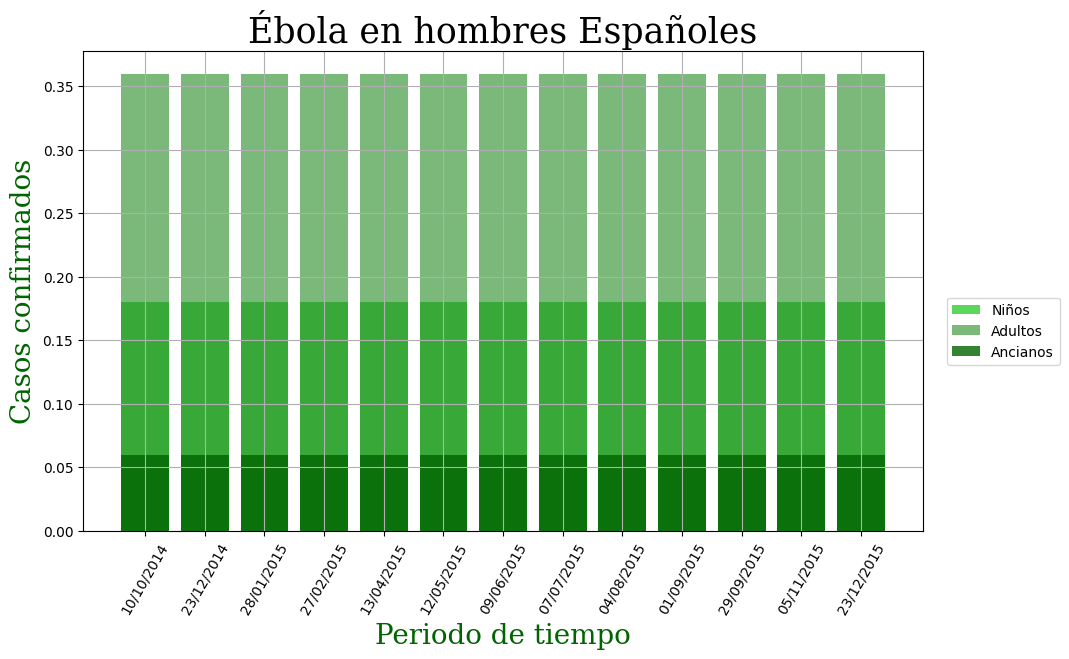

In [71]:
B = S['Boys'][0:-1:20]
AF = S['Adult Male'][0:-1:20]
OF = S['Old Male'][0:-1:20]
Dates = S.index[0:-1:20]

font1 = {'family': 'serif', 'color': 'black', 'size': 25}
font2 = {'family': 'serif', 'color': 'darkgreen', 'size': 20}

# Ajustar márgenes
fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Niños
plt.bar(Dates, B, color='limegreen', alpha=0.8, label='Niños')  # Cambiado a color verde

# Gráfico de barras para Adultos
plt.bar(Dates, AF, color='forestgreen', alpha=0.6, label='Adultos')  # Cambiado a color verde

# Gráfico de barras para Ancianos
plt.bar(Dates, OF, color='darkgreen', alpha=0.8, label='Ancianos')  # Cambiado a color verde

plt.grid()
plt.title("Ébola en hombres Españoles", fontdict=font1)
plt.ylabel('Casos confirmados', fontdict=font2)
plt.xlabel('Periodo de tiempo', fontdict=font2)
plt.xticks(rotation=60, fontsize=10)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados en formato PNG
plt.savefig("Distribucion_del_ebola_en_hombres_espanoles.png", dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()


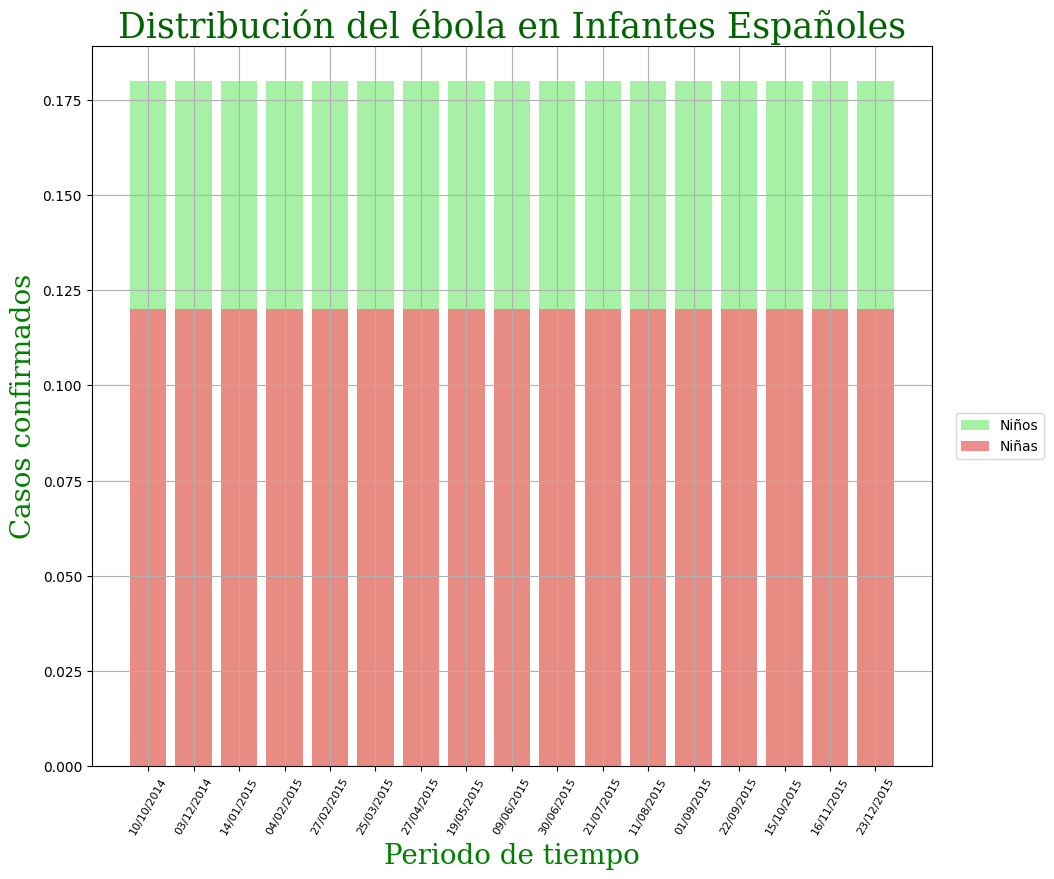

In [72]:
G = S['Girls'][0:-1:15]
B = S['Boys'][0:-1:15]
Dates = S.index[0:-1:15]

font1 = {'family': 'serif', 'color': 'darkgreen', 'size': 25}
font2 = {'family': 'serif', 'color': 'green', 'size': 20}

# Ajustar márgenes
plt.figure(figsize=(12, 9))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Niños
plt.bar(Dates, B, color='lightgreen', alpha=0.8, label='Niños')

# Gráfico de barras para Niñas
plt.bar(Dates, G, color='lightcoral', alpha=0.9, label='Niñas')

plt.grid()
plt.title("Distribución del ébola en Infantes Españoles", fontdict=font1)
plt.ylabel("Casos confirmados", fontdict=font2)
plt.xlabel("Periodo de tiempo", fontdict=font2)
plt.xticks(rotation=60, fontsize=8)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados
plt.savefig('Infantes_Espanoles.png', dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()


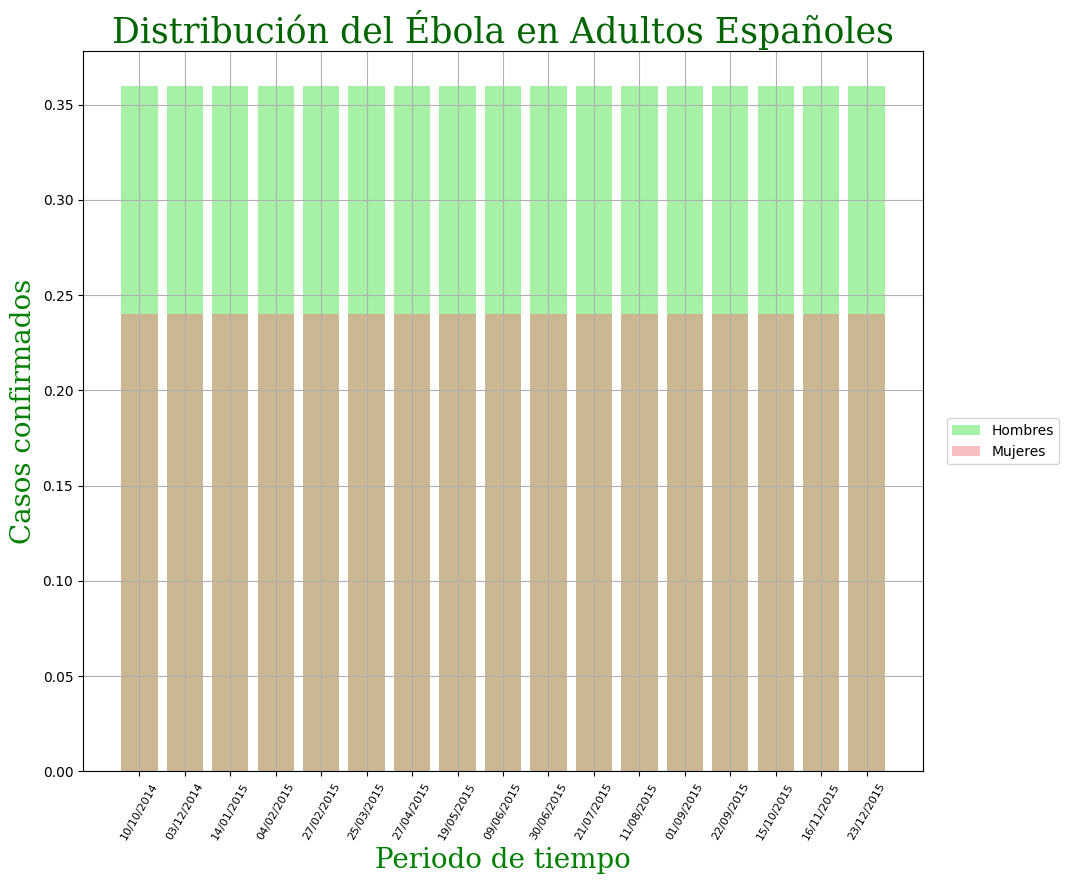

In [73]:
AF = S['Adult Female'][0:-1:15]
AM = S['Adult Male'][0:-1:15]
Dates = S.index[0:-1:15]

font1 = {'family': 'serif', 'color': 'darkgreen', 'size': 25}
font2 = {'family': 'serif', 'color': 'green', 'size': 20}

# Ajustar márgenes
plt.figure(figsize=(12, 9))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Gráfico de barras para Hombres
plt.bar(Dates, AM, color='lightgreen', alpha=0.8, label='Hombres')

# Gráfico de barras para Mujeres
plt.bar(Dates, AF, color='lightcoral', alpha=0.5, label='Mujeres')

plt.grid()
plt.title("Distribución del Ébola en Adultos Españoles", fontdict=font1)
plt.ylabel("Casos confirmados", fontdict=font2)
plt.xlabel("Periodo de tiempo", fontdict=font2)
plt.xticks(rotation=60, fontsize=8)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados
plt.savefig('Adultos_Españoles.png', dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()


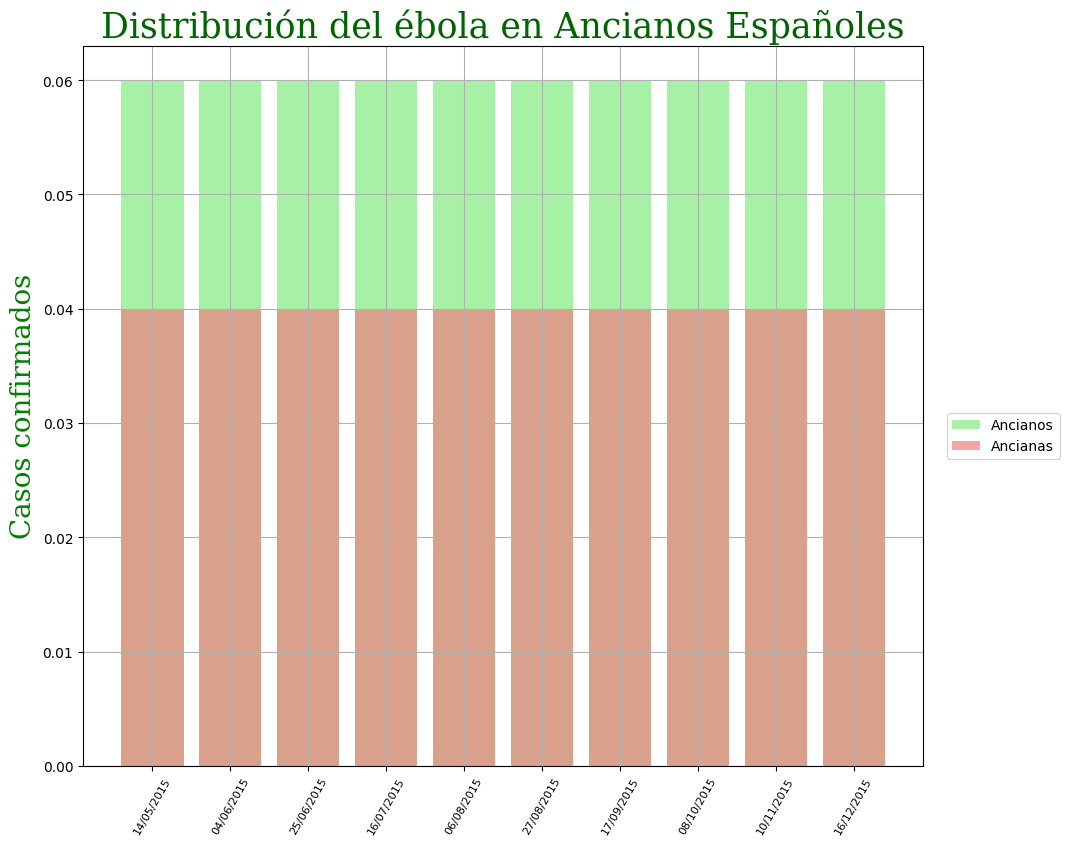

In [74]:
OF = It['Old Female'][0:-1:15]
OM = It['Old Male'][0:-1:15]
Dates = It.index[0:-1:15]

font1 = {'family': 'serif', 'color': 'darkgreen', 'size': 25}
font2 = {'family': 'serif', 'color': 'green', 'size': 20}

# Ajustar márgenes
plt.figure(figsize=(12, 9))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Grafico de barras para Ancianos
plt.bar(Dates, OM, color='lightgreen', alpha=0.8, label='Ancianos')

# Grafico de barras para Ancianas
plt.bar(Dates, OF, color='lightcoral', alpha=0.7, label='Ancianas')

plt.grid()
plt.title("Distribución del ébola en Ancianos Españoles", fontdict=font1)
plt.ylabel("Casos confirmados", fontdict=font2)
plt.xticks(rotation=60, fontsize=8)

# Coloca la leyenda fuera del área de trazado principal
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Guardar la figura con márgenes ajustados
plt.savefig('Ancianos_Españoles.png', dpi=300, format='png', bbox_inches='tight')

# Mostrar la figura
plt.show()

# Entrenamiento de datos de la poblacion española

In [75]:
#Niños Españoles

Boys=S['Boys'].to_numpy()
S_Boys=pd.DataFrame({'Boys':Boys})
S_Boys.index=pd.to_datetime(S.index,format='%d/%m/%Y')
S_Boys=S_Boys.sort_index()

In [76]:
S_Boys

,Boys
Date,
2014-10-10,0.18
2014-10-15,0.18
2014-10-17,0.18
2014-10-22,0.18
2014-10-25,0.18
...,...
2015-12-17,0.18
2015-12-22,0.18
2015-12-23,0.18


In [77]:
steps=46

data_train=S_Boys[:-steps]
data_test=S_Boys[-steps:]

In [78]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 197


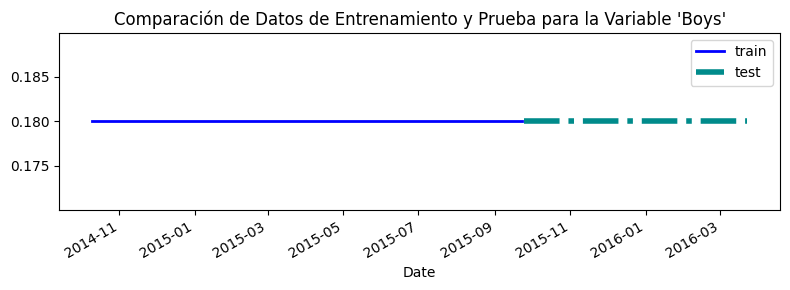

In [79]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Boys'].plot(ax=ax, label='train', color='blue', linewidth= 2)
data_test['Boys'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Boys'")
plt.tight_layout()
plt.savefig("Boys_España.png",dpi=300,format='png')
ax.legend()
plt.show()

In [80]:
#Niñas Españolas

Girls =S['Girls'].to_numpy()
S_Girls=pd.DataFrame({'Girls':Girls})
S_Girls.index=pd.to_datetime(S.index,format='%d/%m/%Y')
S_Girls=S_Girls.sort_index()

In [81]:
S_Girls

,Girls
Date,
2014-10-10,0.12
2014-10-15,0.12
2014-10-17,0.12
2014-10-22,0.12
2014-10-25,0.12
...,...
2015-12-17,0.12
2015-12-22,0.12
2015-12-23,0.12


In [82]:
steps=76

data_train=S_Girls[:-steps]
data_test=S_Girls[-steps:]


In [83]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 167


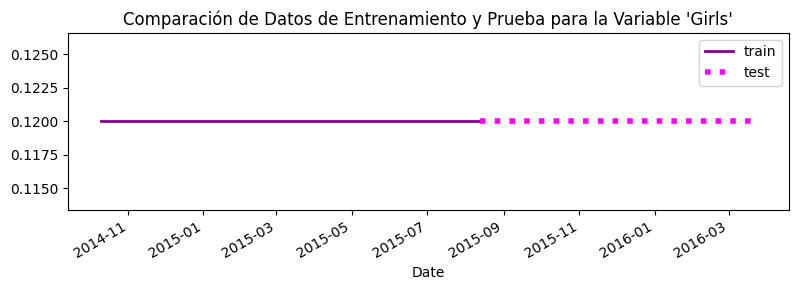

In [84]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Girls'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['Girls'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Girls'")
plt.tight_layout()
plt.savefig("Girls_España.png",dpi=300,format='png')
ax.legend()
plt.show()

In [85]:
#Mujeres españolas
Women = S['Adult Female'].to_numpy()
S_Women = pd.DataFrame({'Women': Women})
S_Women.index = pd.to_datetime(S.index, format='%d/%m/%Y')
S_Women = S_Women.sort_index()

S_Women

,Women
Date,
2014-10-10,0.24
2014-10-15,0.24
2014-10-17,0.24
2014-10-22,0.24
2014-10-25,0.24
...,...
2015-12-17,0.24
2015-12-22,0.24
2015-12-23,0.24


In [86]:
steps = 37
data_train = S_Women[:-steps]
data_test = S_Women[-steps:]

In [87]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 206


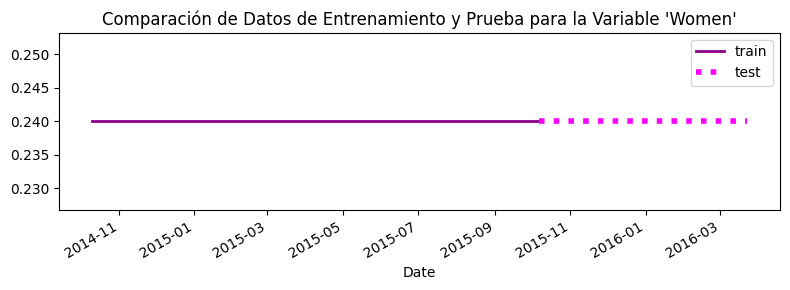

In [88]:
# Gráfica para comparar los datos de entrenamiento vs la prueba
fig, ax = plt.subplots(figsize=(8, 3))

data_train['Women'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['Women'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Women'")
plt.tight_layout()
plt.savefig("Women_España.png",dpi=300,format='png')
ax.legend()
plt.show()

In [89]:
#Hombres españoles
Men = S['Adult Male'].to_numpy()
S_Men = pd.DataFrame({'Men': Men})
S_Men.index = pd.to_datetime(S.index, format='%d/%m/%Y')
S_Men = S_Men.sort_index()

S_Men


,Men
Date,
2014-10-10,0.36
2014-10-15,0.36
2014-10-17,0.36
2014-10-22,0.36
2014-10-25,0.36
...,...
2015-12-17,0.36
2015-12-22,0.36
2015-12-23,0.36


In [90]:
steps = 68
data_train = S_Men[:-steps]
data_test = S_Men[-steps:]

In [91]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 175


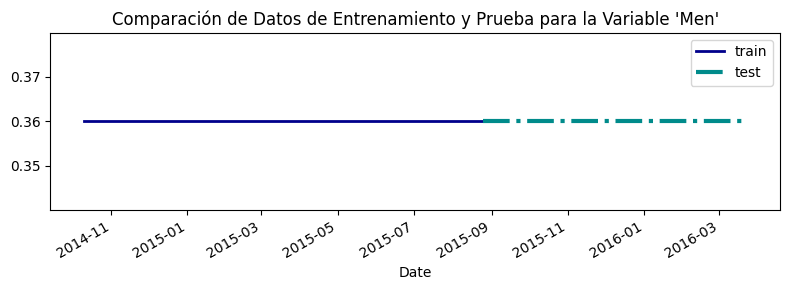

In [92]:
# Gráfica para comparar los datos de entrenamiento vs la prueba

fig, ax = plt.subplots(figsize=(8, 3))

data_train['Men'].plot(ax=ax, label='train', color='darkblue', linewidth= 2)
data_test['Men'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=3)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'Men'")
plt.tight_layout()
plt.savefig("Men_España.png",dpi=300,format='png')
ax.legend()
plt.show()

In [93]:
#Ancianas españolas

O_Women= S['Old Female'].to_numpy()
S_O_Women = pd.DataFrame({'O_Women': O_Women})
S_O_Women.index = pd.to_datetime(S.index, format='%d/%m/%Y')
S_O_Women = S_O_Women.sort_index()

S_O_Women

,O_Women
Date,
2014-10-10,0.04
2014-10-15,0.04
2014-10-17,0.04
2014-10-22,0.04
2014-10-25,0.04
...,...
2015-12-17,0.04
2015-12-22,0.04
2015-12-23,0.04


In [94]:
steps = 96
data_train = S_O_Women[:-steps]
data_test = S_O_Women[-steps:]

In [95]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 147


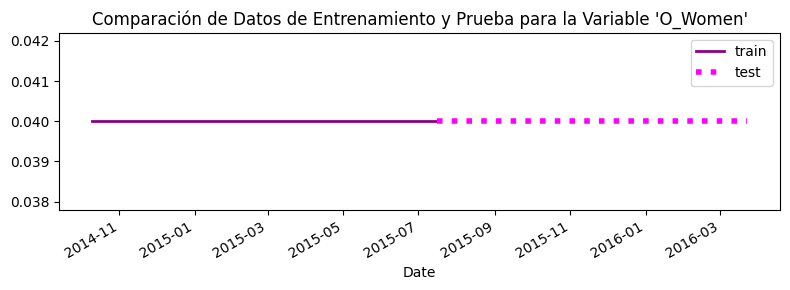

In [96]:
# Gráfica para comparar los datos de entrenamiento vs la prueba
fig, ax = plt.subplots(figsize=(8, 3))

data_train['O_Women'].plot(ax=ax, label='train', color='darkmagenta', linewidth= 2)
data_test['O_Women'].plot(ax=ax, label='test', color='magenta', linestyle=':', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'O_Women'")
plt.tight_layout()
plt.savefig("O_Women_España.png",dpi=300,format='png')
ax.legend()
plt.show()

In [97]:
#Ancianos españoles

O_Men= S['Old Male'].to_numpy()
S_O_Men = pd.DataFrame({'O_Men': O_Men})
S_O_Men.index = pd.to_datetime(S.index, format='%d/%m/%Y')
S_O_Men = S_O_Men.sort_index()

S_O_Men

,O_Men
Date,
2014-10-10,0.06
2014-10-15,0.06
2014-10-17,0.06
2014-10-22,0.06
2014-10-25,0.06
...,...
2015-12-17,0.06
2015-12-22,0.06
2015-12-23,0.06


In [98]:
steps = 44
data_train = S_O_Men[:-steps]
data_test = S_O_Men[-steps:]

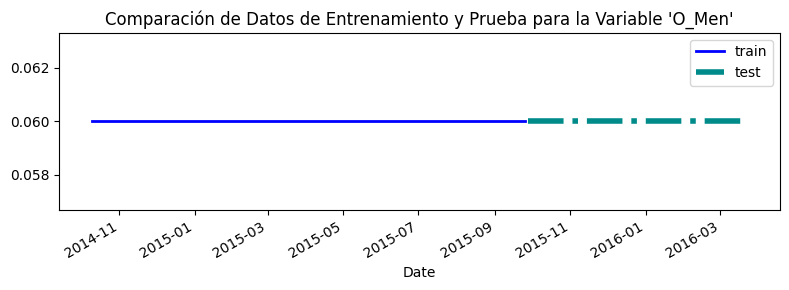

In [99]:
# Gráfica para comparar los datos de entrenamiento vs la prueba
fig, ax = plt.subplots(figsize=(8, 3))

data_train['O_Men'].plot(ax=ax, label='train', color='blue', linewidth= 2)
data_test['O_Men'].plot(ax=ax, label='test', color='darkcyan', linestyle='-.', linewidth=4)

plt.title("Comparación de Datos de Entrenamiento y Prueba para la Variable 'O_Men'")
plt.tight_layout()
plt.savefig("O_Men_España.png",dpi=300,format='png')
ax.legend()
plt.show()